## 1) Import useful libraries

In [2]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from keras.models import load_model
from sklearn.model_selection import train_test_split
from  keras.utils import normalize
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

## 2) Retrive the data

In [3]:
image_directory='Brain Tumor (yes,no)/dataset'
no_tumors_images=os.listdir(image_directory+'/no')
yes_tumors_images=os.listdir(image_directory+'/yes')

dataset=[]
label=[]

INPUT_SIZE=64

In [4]:
for i, image_name in enumerate(no_tumors_images):
    if (image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+ '/no/'+ image_name)
        image=Image.fromarray(image, 'RGB') # convert in array
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)
        
        
for i, image_name in enumerate(yes_tumors_images):
    if (image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+ '/yes/'+ image_name)
        image=Image.fromarray(image, 'RGB') # convert in array
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [5]:
print(f'Length of the dataset: {len(label)} and the length of dataset is: {len(dataset)}')

Length of the dataset: 3000 and the length of dataset is: 3000


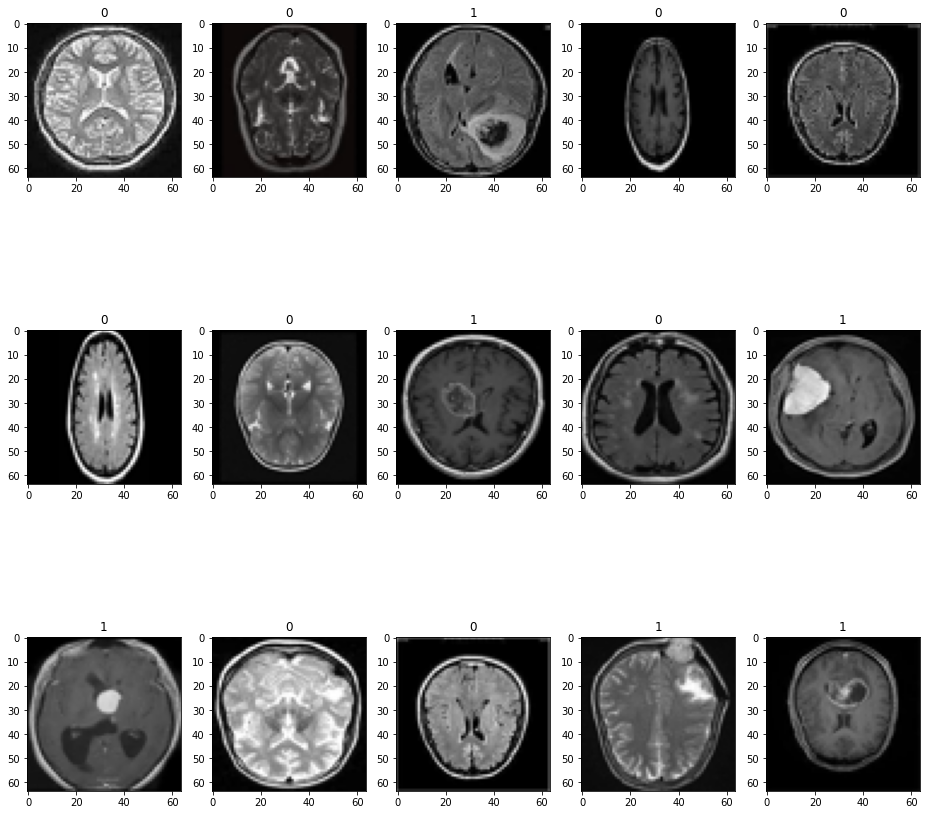

In [6]:
import random as rd

fig = plt.figure(figsize=(16, 16)) 
columns = 5
rows = 3
for i in range(1,columns*rows+1):
    index=rd.randint(0,len(dataset))
    fig.add_subplot(rows, columns, i) 
    plt.imshow(dataset[index])
    plt.title(label[index])
plt.show()

In [7]:
dataset=np.array(dataset)
label=np.array(label)

x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0, shuffle=True)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(2400, 64, 64, 3)
(2400,)
(600, 64, 64, 3)
(600,)


In [8]:
# Normalization of data

x_train=normalize(x_train, axis=1)
x_test=normalize(x_test,axis=1)

## 3) Build a model

In [9]:
model=Sequential()

model.add(Conv2D(32, (3,3),input_shape=(INPUT_SIZE, INPUT_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1)) # Binary classification
model.add(Activation('sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history=model.fit( x_train, y_train,
          batch_size=16, 
          verbose=1, 
          epochs=10, 
          validation_data=(x_test, y_test))
         

Epoch 1/10
150/150 [==============================] - 7s 42ms/step - loss: 0.5226 - accuracy: 0.7433 - val_loss: 0.4432 - val_accuracy: 0.8017
Epoch 2/10
150/150 [==============================] - 6s 42ms/step - loss: 0.3803 - accuracy: 0.8375 - val_loss: 0.3195 - val_accuracy: 0.8550
Epoch 3/10
150/150 [==============================] - 6s 43ms/step - loss: 0.3128 - accuracy: 0.8667 - val_loss: 0.2853 - val_accuracy: 0.8800
Epoch 4/10
150/150 [==============================] - 6s 43ms/step - loss: 0.2229 - accuracy: 0.9125 - val_loss: 0.1800 - val_accuracy: 0.9467
Epoch 5/10
150/150 [==============================] - 6s 43ms/step - loss: 0.1469 - accuracy: 0.9492 - val_loss: 0.1606 - val_accuracy: 0.9467
Epoch 6/10
150/150 [==============================] - 7s 43ms/step - loss: 0.1070 - accuracy: 0.9654 - val_loss: 0.1361 - val_accuracy: 0.9600
Epoch 7/10
150/150 [==============================] - 7s 48ms/step - loss: 0.0773 - accuracy: 0.9742 - val_loss: 0.1207 - val_accuracy: 0.9633

In [12]:
# save the model after the last epoch

model.save('BrainTumor10EpochsCategorical.h5')

## 4) Result and predictions

<AxesSubplot:title={'center':'Rate_validation acording the number of epochs'}, xlabel='epochs', ylabel='rate_validity'>

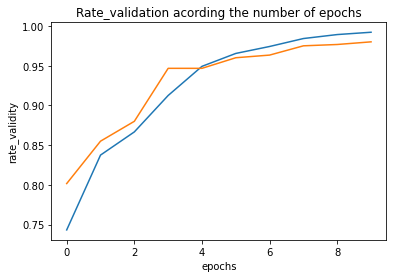

In [13]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use Pandas native plot method
plt.xlabel("epochs")
plt.ylabel("rate_validity")
plt.title("Rate_validation acording the number of epochs")
history_df['accuracy'].plot()
history_df['val_accuracy'].plot()

<AxesSubplot:title={'center':'loss acording the number of epochs'}, xlabel='epochs', ylabel='loss'>

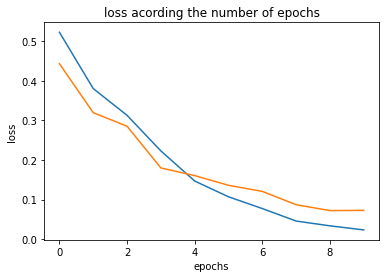

In [14]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use Pandas native plot method
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss acording the number of epochs")
history_df['loss'].plot()
history_df['val_loss'].plot()

In [15]:
model=load_model('BrainTumor10EpochsCategorical.h5')

In [16]:
img=cv2.imread('Brain Tumor (yes,no)/pred/pred5.jpg')

In [17]:
img=Image.fromarray(img)
img=img.resize((INPUT_SIZE,INPUT_SIZE))
img=np.array(img)

input_img=np.expand_dims(img, axis=0)

In [18]:
result=model.predict(input_img)
print(result)

1/1 [==============================] - 0s 229ms/step
[[1.]]


In [19]:
test_directory='Brain Tumor (yes,no)/pred/'
imagesTest_tumors=os.listdir(test_directory)


dataset_test=[]
label_test=[]

for i, image_name in enumerate(imagesTest_tumors):
    if (image_name.split('.')[1]=='jpg'):
        img=cv2.imread(test_directory+ image_name)
        img=Image.fromarray(img, 'RGB') # convert in array
        img=img.resize((INPUT_SIZE,INPUT_SIZE))
        dataset_test.append(np.array(img))
        input_img=np.expand_dims(img, axis=0)
        label_test.append(model.predict(input_img))

1/1 [==============================] - 0s 16ms/step


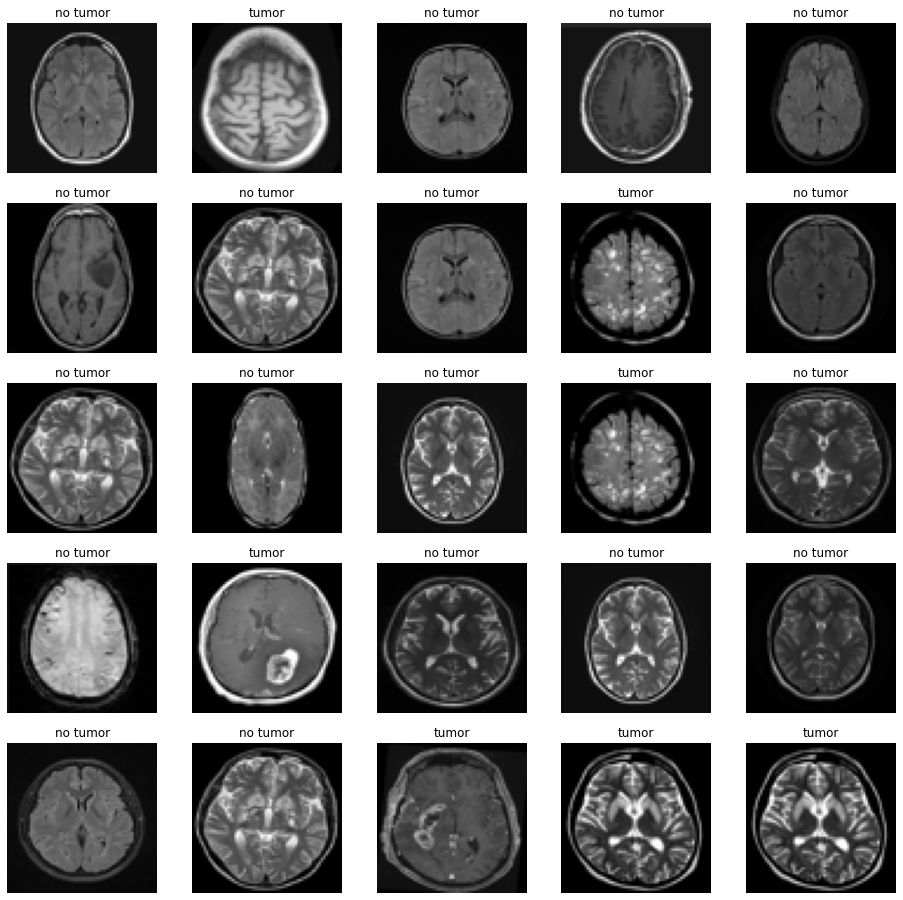

In [20]:
import random as rd

fig = plt.figure(figsize=(16, 16)) 
columns = 5
rows = 5
for i in range(1,columns*rows+1):
    index=rd.randint(0,50)
    fig.add_subplot(rows, columns, i) 
    plt.imshow(dataset_test[index])
    plt.axis('off')
    if (label_test[index]==[[0.]]):
        plt.title('no tumor')
    else:
        plt.title('tumor')
plt.show()